In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [85]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df.shape

(891, 12)

In [88]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
#checking the missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
df.Cabin = df.Cabin.fillna('NA')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NA,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NA,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


THERE ARE 687 MISSING VALUES IN CABIN,177 IN AGE AND 2 IN EMBARKED

In [92]:
#checking the missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

IT IS NOT POSSIBLE FOR US TO CALCULATE 687 MISSING VALUES OF CABIN

SO WE WILL HAVE TO DROP THE CABIN COLUMN

In [93]:
#DROPPING THE CABIN COLUMN
df=df.drop(columns='Cabin',axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


NOW TO HANDLE 177 MISSING VALUES FOR AGE WE HAVE TO TAKE THE MEAN OF AGE


In [94]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

TO HANDLE EMBARKED COLUMN SINCE WE HAVE 3 VALUES ONLY AS C,S AND Q. SO WE WILL FILL THE MISSING VALUE WITH THE VALUE THAT IS OCCURING MOST NO OF TIMES


In [95]:
#CALCULATING THE MODE VALUE FOR THE EMBARKED COLUMN
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [96]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

AS SEEN ABOVE THERE ARE NO NULL VALUES IN THE ABOVE DATA SET



In [97]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [98]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


THIS IS NOT GIVING ANY INSIGHTS IN CASE OF CATEGORICAL DATA IN SURVIVED,SIBSP AND PARCH

In [99]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


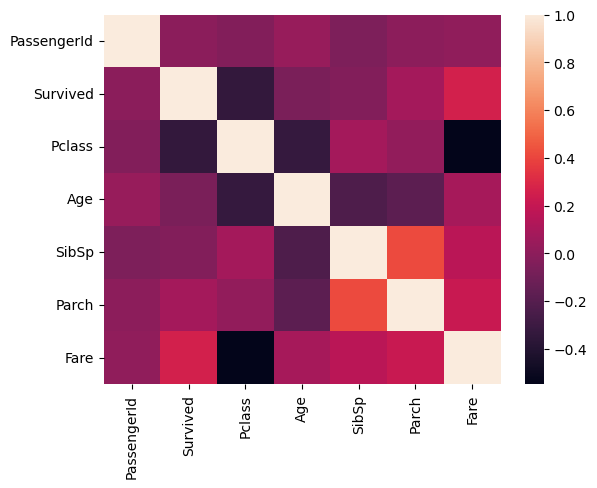

In [100]:
sns.heatmap(df.corr())
plt.show()

IN THIS WE CAN SEE THAT THE LOWER THE NUMBER IN THE PCLASS THE HIGHER THE CHANCES OF SURVIVAL
BUT IN CASE OF FARE THE HIGHER THE FARE HIGHER THE CHANCES OF SURVIVAL

In [101]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# DATA VISUALISATION

<Axes: xlabel='Survived', ylabel='count'>

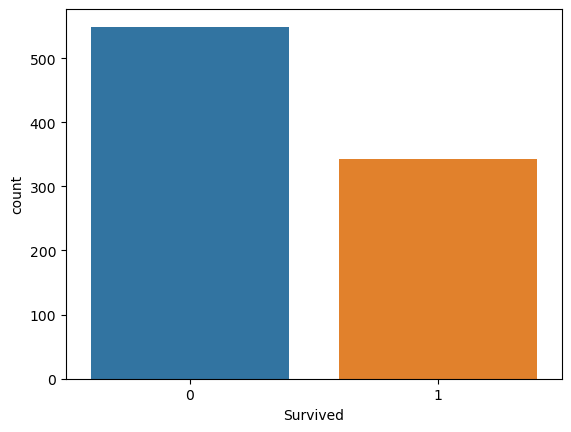

In [102]:
sns.countplot(x='Survived',data=df)

FROM THE ABOVE IT IS OBSERVED THAT 549 PASSENGERS HAVE NOT SURVIVED AND 342 SURVIVED

In [103]:
# LETS OBSERVED FOR SEX HOW MANY MALE AND FEMALES WERE THERE

df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

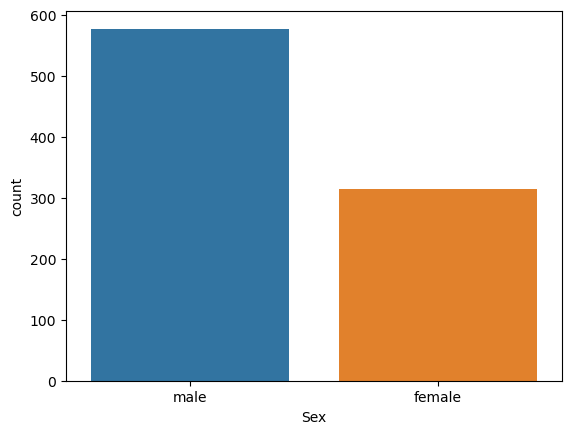

In [104]:
sns.countplot(x='Sex',data=df)

THERE ARE 577 MALES AND 314 FEMALES. NOW LETS OBSERVE HOW MANY MALES AND FEMALES SURVIVED AND NOT SURVIVED

<Axes: xlabel='Sex', ylabel='count'>

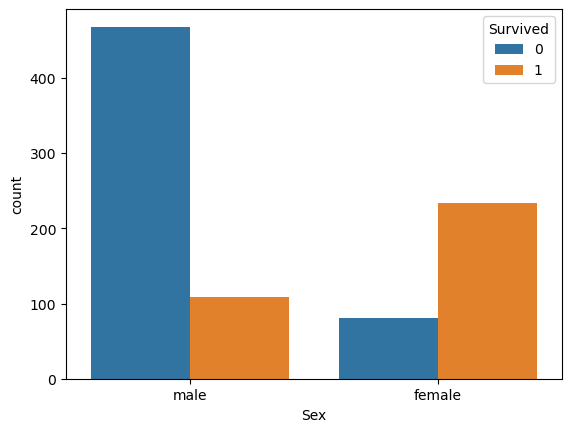

In [105]:
sns.countplot(x='Sex',hue='Survived',data=df)

FROM THIS WE CAN SEE THAT EVEN THOUGH THE NUMBER OF MALES ARE MORE THAN THE FEMALE BUT THERE ARE MORE FEMALE SURVIVORS

<Axes: xlabel='Pclass', ylabel='count'>

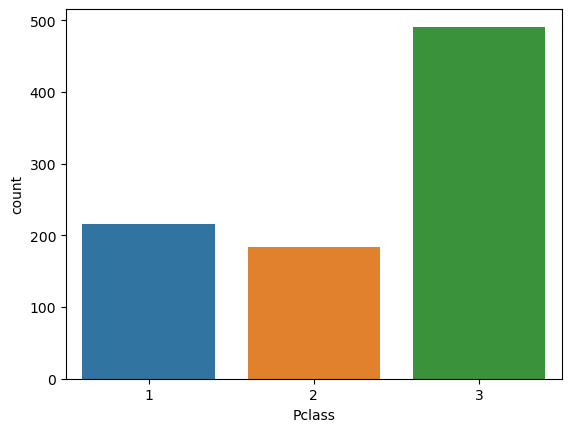

In [106]:
sns.countplot(x='Pclass',data=df)

In [107]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

AS WE CAN SEE THERE ARE MORE PASSENGERS IN THIRD CLASS NOW LETS OBSERVE HOLW MANY SURVIVED FROM WHICH CLASS

<Axes: xlabel='Pclass', ylabel='count'>

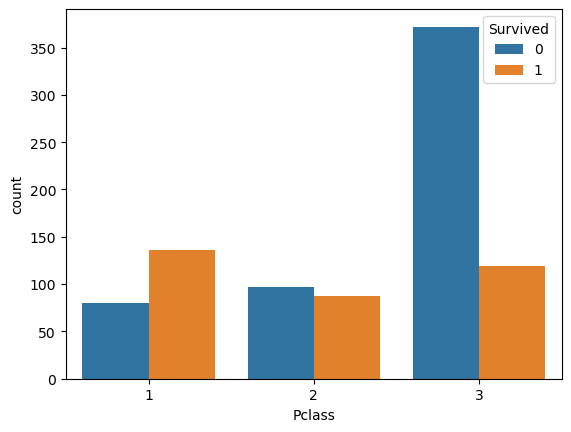

In [108]:
sns.countplot(x='Pclass',hue='Survived',data=df)

FROM ABOVE IT IS SEEN THAT SURVIVED PASSENGERS ARE MORE IN THE CASE OF 1ST CLASS

<Axes: xlabel='SibSp', ylabel='count'>

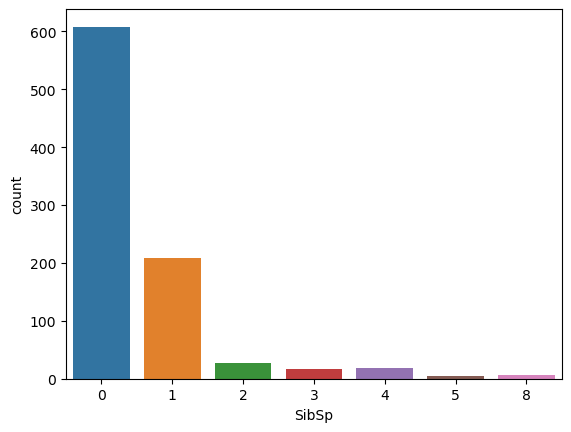

In [109]:
sns.countplot(x='SibSp',data=df)

In [110]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

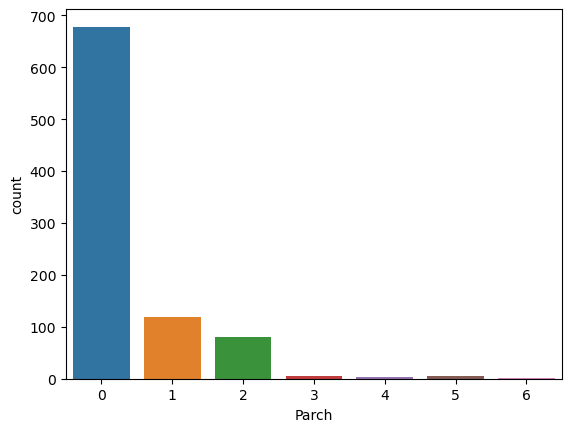

In [111]:
sns.countplot(x='Parch',data=df)

In [112]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

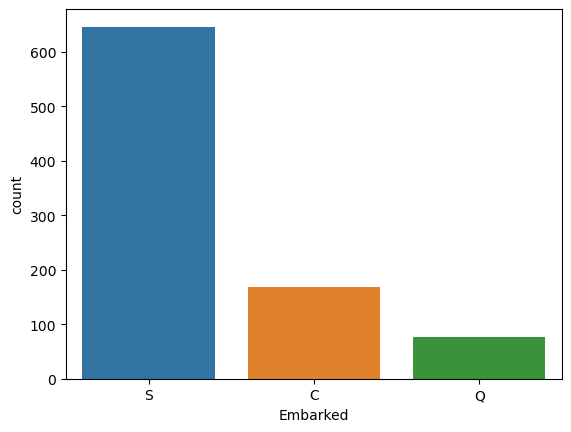

In [113]:
sns.countplot(x='Embarked',data=df)

In [114]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

SO THE MAXIMUM NUMBER OF PEOPLE EMBARKED IS FROM SOUTHAMPTON

  NOW LETS CONVERT SEX COLUMN INTO NUMERICAL VALUE BY USING LABEL ENCODER

LABEL ENCODER

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
le=LabelEncoder()

In [117]:
df['Sex']=le.fit_transform(df['Sex'])

In [118]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C


In [119]:
df['Embarked']=le.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


NOW LETS CHECK THE DISTRIBUTION OF SKEWNESS

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

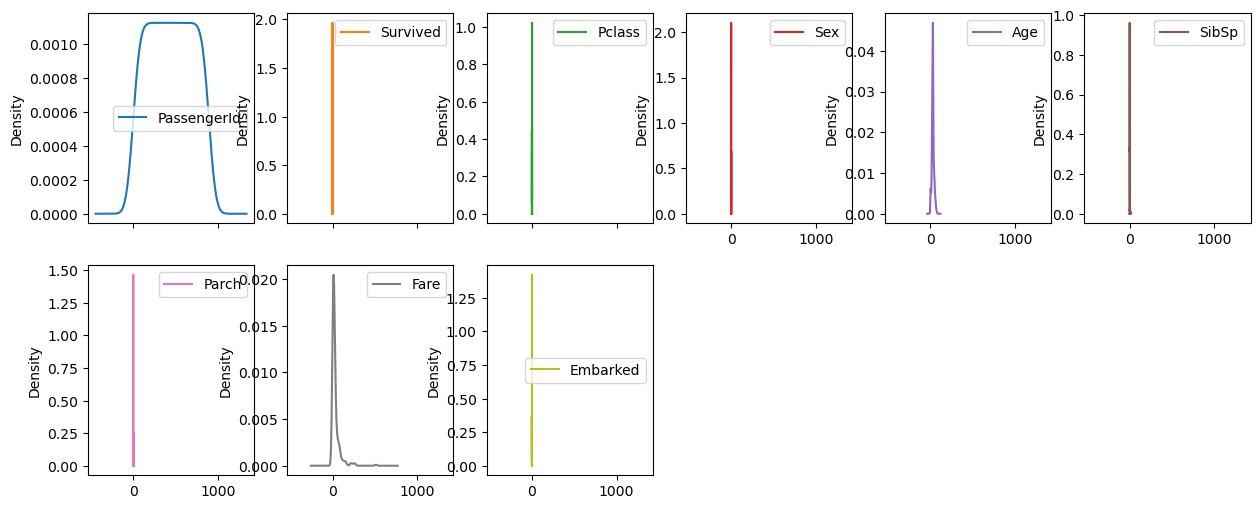

In [120]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

<Axes: >

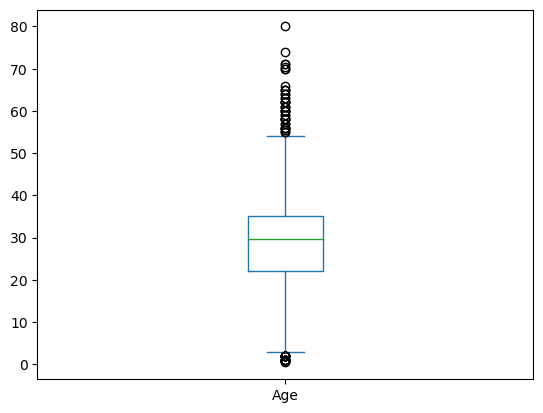

In [121]:
#plotting outliers
df['Age'].plot.box()

<Axes: >

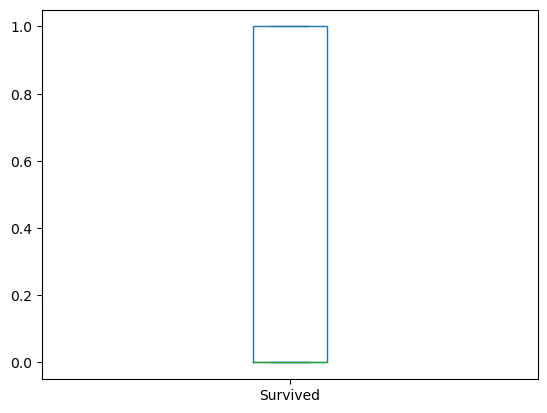

In [122]:
df['Survived'].plot.box()

<Axes: >

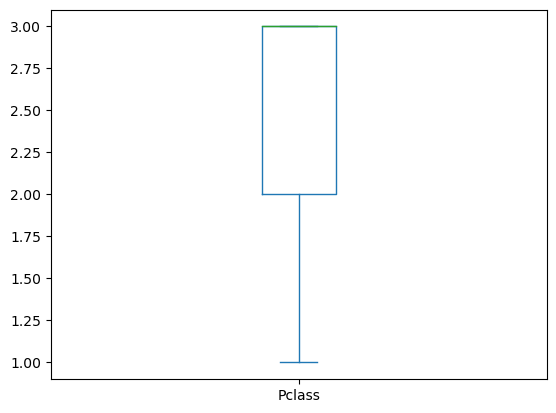

In [123]:
df['Pclass'].plot.box()

<Axes: >

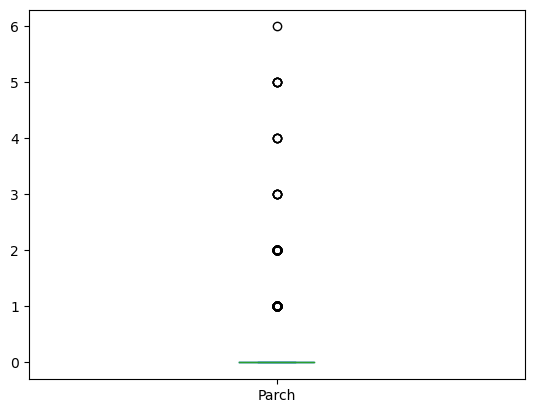

In [124]:
df['Parch'].plot.box()

AS WE CAN SEE OUTLIERS ARE PRESENT LETS REMOVE THE OUTLIERS BY USING ZSCORE

In [125]:
from scipy.stats import zscore

In [126]:
df.drop('Name',axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,0,35.000000,1,0,113803,53.1000,2
4,5,0,3,1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536,13.0000,2
887,888,1,1,0,19.000000,0,0,112053,30.0000,2
888,889,0,3,0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,1,26.000000,0,0,111369,30.0000,0


In [127]:
df.drop('Ticket',axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [128]:
z=np.abs(zscore(df))
z

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.730108,0.789272,0.827377,0.737695,0.592481,0.432793,0.473674,0.502445,0.585954
1,1.726220,1.266990,1.566107,1.355574,0.638789,0.432793,0.473674,0.786845,1.942303
2,1.722332,1.266990,0.827377,1.355574,0.284663,0.474545,0.473674,0.488854,0.585954
3,1.718444,1.266990,1.566107,1.355574,0.407926,0.432793,0.473674,0.420730,0.585954
4,1.714556,0.789272,0.827377,0.737695,0.407926,0.474545,0.473674,0.486337,0.585954
...,...,...,...,...,...,...,...,...,...
886,1.714556,0.789272,0.369365,0.737695,0.207709,0.474545,0.473674,0.386671,0.585954
887,1.718444,1.266990,1.566107,1.355574,0.823344,0.474545,0.473674,0.044381,0.585954
888,1.722332,0.789272,0.827377,1.355574,0.000000,0.432793,2.008933,0.176263,0.585954
889,1.726220,1.266990,1.566107,0.737695,0.284663,0.474545,0.473674,0.044381,1.942303


In [129]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([6, 5, 6, 7, 5, 5, 5, 5, 6, 7, 4, 4, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 7, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 5, 4, 7, 5, 5, 7, 6,
       6, 4, 6, 4, 6, 7, 5, 5, 7, 7, 7, 7, 6, 7, 7, 4, 6, 7, 5, 5, 5, 5,
       5, 5, 4, 6, 5, 6], dtype=int64))


In [130]:
df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [131]:
#now separating data as features and target
x=df_new.drop(columns=['PassengerId','Survived'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [132]:
y=df_new['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

# TUNING THE MODEL

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [134]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print("Best Score::",maxAcc)
print("Random State:",rs)

Best Score:: 0.8780487804878049
Random State: 201


In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=rs)

In [136]:
x_train.shape

(656, 7)

In [137]:
x_test.shape

(164, 7)

In [138]:
y_train.shape

(656,)

In [139]:
y_test.shape

(164,)

# MACHINE LEARNING MODELS FOR CLASSIFICATION

In [140]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=794)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc_score=(accuracy_score(y_test,pred))
    print("Accuracy Score:",acc_score)
    print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred))
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    cv_score=(cross_val_score(clf,x,y,cv=5).mean())
    print("Cross validation Score:",cv_score)
    
    result=acc_score-cv_score
    print("\nAccuracy Score-Cross Validation Score",result)
    

# LOGISTIC REGRESSION

In [141]:
clf=LogisticRegression()
classify(clf,x,y)


Accuracy Score: 0.8

Confusion Matrix:
 [[98 18]
 [23 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       116
           1       0.79      0.74      0.76        89

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.80       205
weighted avg       0.80      0.80      0.80       205

Cross validation Score: 0.7890243902439026

Accuracy Score-Cross Validation Score 0.01097560975609746


# DECISION TREE CLASSIFIER

In [142]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.8195121951219512

Confusion Matrix:
 [[102  14]
 [ 23  66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       116
           1       0.82      0.74      0.78        89

    accuracy                           0.82       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.82      0.82       205

Cross validation Score: 0.7524390243902438

Accuracy Score-Cross Validation Score 0.06707317073170738


# RANDOM FOREST CLASSIFIER

In [143]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.8146341463414634

Confusion Matrix:
 [[100  16]
 [ 22  67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       116
           1       0.81      0.75      0.78        89

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205

Cross validation Score: 0.7951219512195122

Accuracy Score-Cross Validation Score 0.019512195121951126


# SVM

In [144]:
clf=SVC()
classify(clf,x,y)

Accuracy Score: 0.6829268292682927

Confusion Matrix:
 [[108   8]
 [ 57  32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.77       116
           1       0.80      0.36      0.50        89

    accuracy                           0.68       205
   macro avg       0.73      0.65      0.63       205
weighted avg       0.72      0.68      0.65       205

Cross validation Score: 0.7036585365853659

Accuracy Score-Cross Validation Score -0.02073170731707319


HERE THE ACCURACY SCORE OF OUR MODEL IS HIGHEST IN CASE OF DECISION TREE CLASSIFIER

# HYPERPARAMETER TUNING USING DECISION TREE CLASSIFIER

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters for decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate model with best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.8658536585365854


# AUC ROC CURVE

In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [148]:
dt=DecisionTreeClassifier()

In [150]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

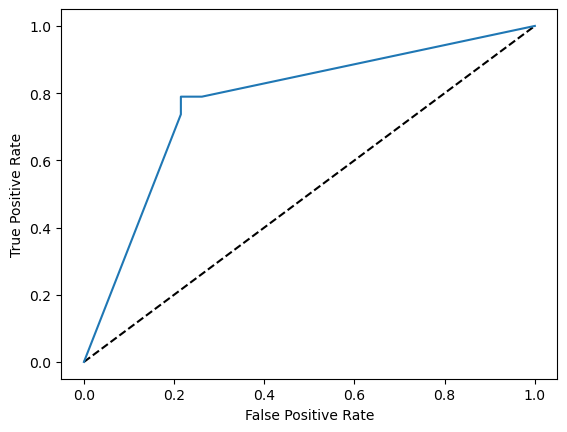

In [151]:
y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="DecisionTreeClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [154]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

0.7872602065912444


OUR MODEL AUC SCORE IS 0.7872602065912444 SO ITS WORKING MODERATELY WELL

